In [1]:
import numpy as np

from CSR import *
import matplotlib.pyplot as plt
from matplotlib import cm
import h5py
from tools import plot_surface

--------------------------------------------------------------------------
No OpenFabrics connection schemes reported that they were able to be
used on a specific port.  As such, the openib BTL (OpenFabrics
support) will be disabled for this port.

  Local host:           sdfiana007
  Local device:         mlx5_0
  Local port:           1
  CPCs attempted:       rdmacm, udcm
--------------------------------------------------------------------------


In [2]:
5*0.01/1e3/3e8

1.6666666666666667e-13

## Run DFCSR

In [3]:
testCSR = CSR2D(input_file= 'input/dipole_config.yaml')

In [ ]:
testCSR.run()

Calculating CSR at s= 0.05
--- 18.182695627212524 seconds ---
Beams written to  /sdf/data/ad/ard/u/jytang/pyDFCSR/dipole_output/chirp-2024-04-14T00_56_09-07_00-particles.h5
Wakes written to  /sdf/data/ad/ard/u/jytang/pyDFCSR/dipole_output/chirp-2024-04-14T00_56_09-07_00-wakes.h5
Finish step 2 in 19.305580139160156 seconds
Calculating CSR at s= 0.1
Finish step 3 in 0.5504662990570068 seconds
Calculating CSR at s= 0.15000000000000002
--- 17.95130753517151 seconds ---
Beams written to  /sdf/data/ad/ard/u/jytang/pyDFCSR/dipole_output/chirp-2024-04-14T00_56_09-07_00-particles.h5
Wakes written to  /sdf/data/ad/ard/u/jytang/pyDFCSR/dipole_output/chirp-2024-04-14T00_56_09-07_00-wakes.h5
Finish step 4 in 19.22356104850769 seconds
Calculating CSR at s= 0.2
Finish step 5 in 0.6498570442199707 seconds
Calculating CSR at s= 0.25
--- 17.954421520233154 seconds ---
Beams written to  /sdf/data/ad/ard/u/jytang/pyDFCSR/dipole_output/chirp-2024-04-14T00_56_09-07_00-particles.h5
Wakes written to  /sdf/dat

## Parallel Run with MPI

In [5]:
# input yaml file in "./input/dipole_config.yaml"
!mpirun -n 4 python  -m pyDFCSR_mpi_run ./input/chicane_config.yaml

'mpirun' is not recognized as an internal or external command,
operable program or batch file.


## Plot output

In [5]:
from plot_from_output import DFCSR_postprocessor

DFplot = DFCSR_postprocessor(run_name = 'chirp-2024-04-13T22_25_47-07_00',
                             work_dir = '/sdf/data/ad/ard/u/jytang/pyDFCSR/dipole_output')

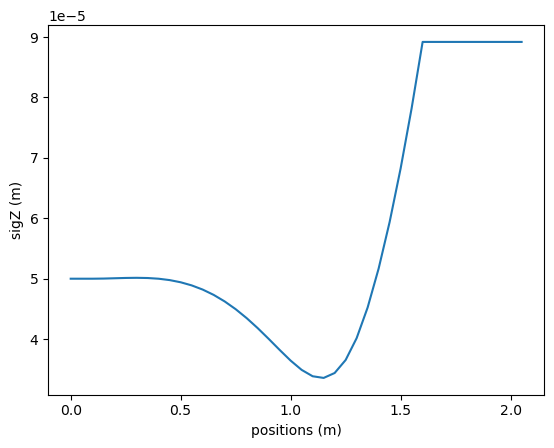

In [6]:
# Plot beam size along the lattice
DFplot.plot_stats(key = 'sigZ')

plot longitudinal wakes at nearest point s  = 2.0500000000000007 m, step count 41
ebeam energy 5000000026.236997


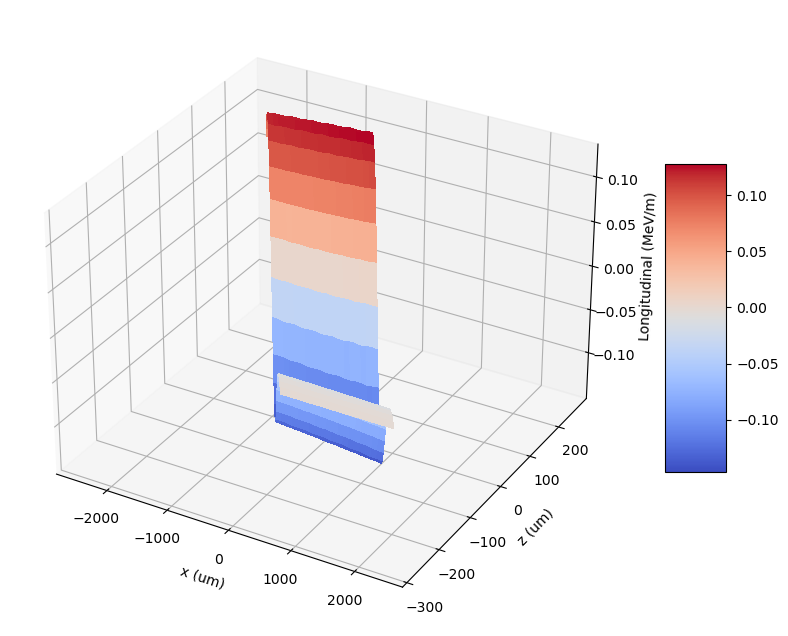

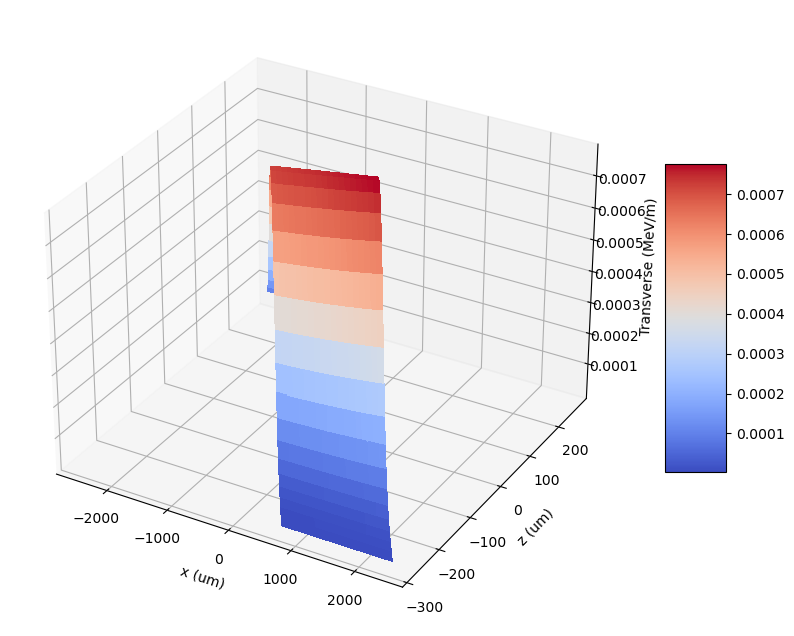

In [25]:
DFplot.plot_wakes(s = 2.2)

plot longitudinal wakes at nearest point s  = 0.5499999999999999 m, step count 11


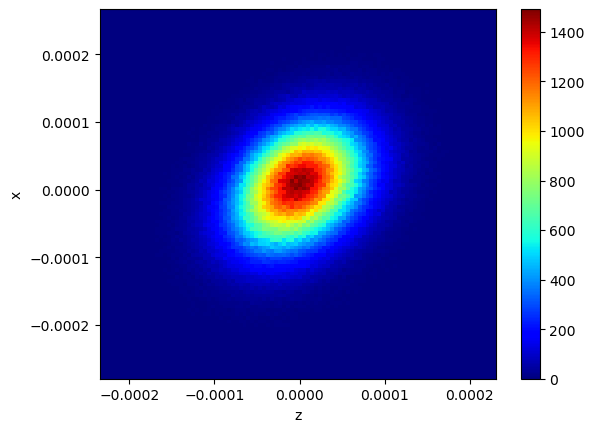

In [26]:
DFplot.plot_particles(s = 0.6, xkey = 'z', ykey = 'x')

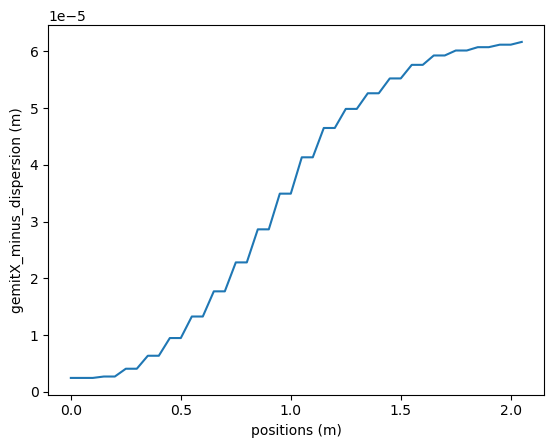

In [27]:
DFplot.plot_stats(key = 'gemitX_minus_dispersion')